# Exploratory data analysis

## importing necessary libraries for EDA

In [1]:
import re
import string
from nltk.corpus import stopwords

from collections import Counter

> if you get an error when importing stopwords, you should run these commands first

`import nltk`
`nltk.download('stopwords')` 

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## checking the data

In [3]:
df = pd.read_csv('data/train.csv', index_col='id')
df.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.isnull().sum() / df.count()

keyword     0.008077
location    0.498622
text        0.000000
target      0.000000
dtype: float64

location is 50% of the times empty.
therefore, we may need to check the correlation between having a location with the target variable

count of each label: target
0    4342
1    3271
Name: count, dtype: int64
percent of true label: 42.97 %


<Axes: xlabel='target', ylabel='Count'>

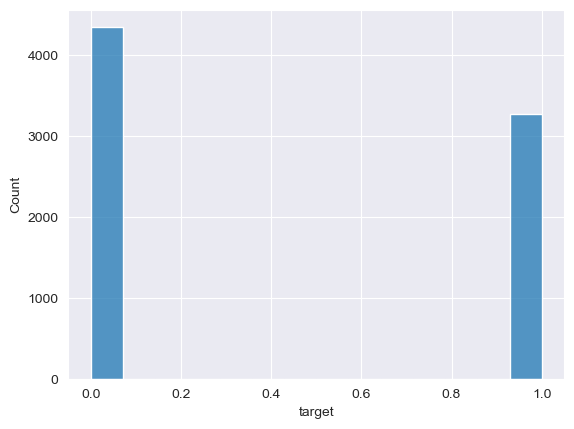

In [5]:
print('count of each label:', df['target'].value_counts())
print('percent of true label:', round(len(df[df['target'] == 1]) / len(df['target']) * 100, 2), '%')
sns.histplot(df.target)

about 43% of the labels are True and 57% are False
So the data is balanced and has adequate amount of samples for both labels

In [8]:
len(df['keyword'].value_counts())

221

In [9]:
df['words_count'] = df.text.apply(len)

Text(0.5, 0, 'words count')

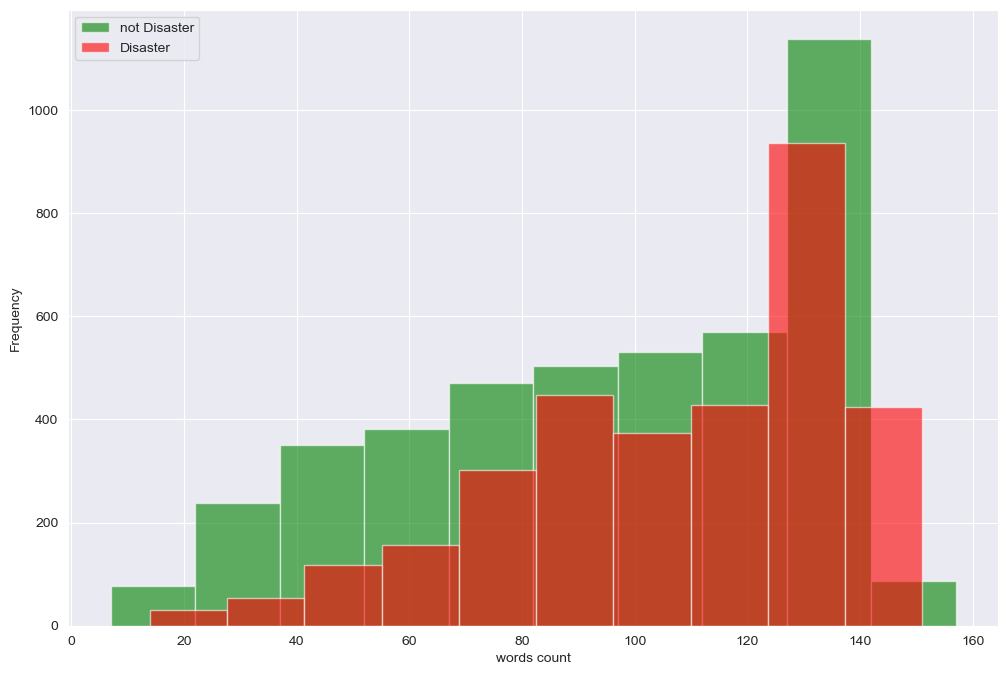

In [10]:
plt.figure(figsize=(12, 8))

df[df.target == 0].words_count.plot(kind='hist', color='green',
                                    label='not Disaster', alpha=0.6)
df[df.target == 1].words_count.plot(kind='hist', color='red',
                                    label='Disaster', alpha=0.6)
plt.legend()
plt.xlabel("words count")

as you can see, the length of the text does not give an incisive distinction between emergency and non-emergency labels as they follow the similar distribution.
we may need to look more into the text column:

## exploring the text column

In [11]:
text = df['text'].str.cat(sep=' ')
text[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

In [12]:
def get_words_count(words: str):
    return Counter(words.split(' '))

In [13]:
get_words_count(text).most_common(20)

[('the', 2573),
 ('a', 1840),
 ('to', 1804),
 ('in', 1757),
 ('of', 1721),
 ('and', 1301),
 ('I', 1186),
 ('for', 820),
 ('is', 814),
 ('on', 773),
 ('', 770),
 ('-', 762),
 ('you', 631),
 ('my', 547),
 ('The', 541),
 ('with', 508),
 ('that', 491),
 ('at', 485),
 ('by', 467),
 ('it', 432)]

As you can see, there are words which are common in all texts and are not a good identification for using in the model for prediction.
such as 'the', 'a', 'to', 'in', 'of', 'and', ...
we can eliminate these words by stopwords from nltk.corpus package

In [14]:
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

we also need to remove the punctuation from text in order to analyze it better

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def text_process(mess: str):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower().strip()

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [17]:
df['clean_text'] = df['text'].apply(text_process)
df.head()

,keyword,location,text,target,words_count,clean_text
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deeds reason earthquake may allah forgive us
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,residents asked shelter place notified officer...
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfires evacuation orde...
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfires pou...


Text(0.5, 0, 'clean words count')

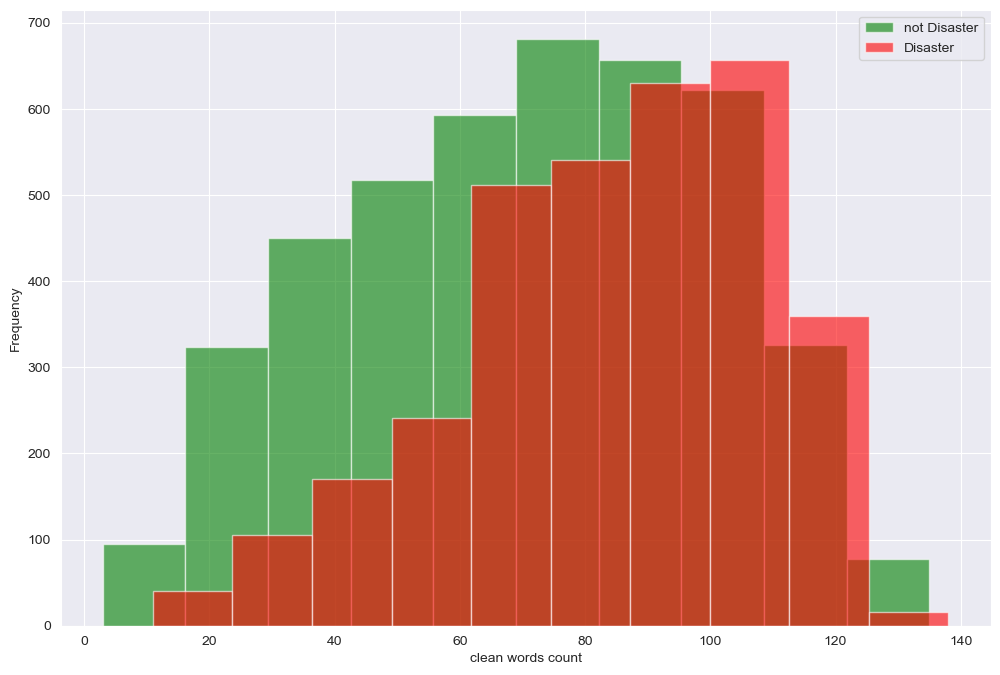

In [18]:
df['clean_words_count'] = df['clean_text'].apply(len)

plt.figure(figsize=(12, 8))

df[df.target == 0].clean_words_count.plot(kind='hist', color='green',
                                          label='not Disaster', alpha=0.6)
df[df.target == 1].clean_words_count.plot(kind='hist', color='red',
                                          label='Disaster', alpha=0.6)
plt.legend()
plt.xlabel("clean words count")

like before, both groups are following the same distribution. However, it seems that now disaster samples have skewness to the right compared to non-disaster samples.

In [19]:
clean_text = df['clean_text'].str.cat(sep=' ')
clean_text[:1000]

'deeds reason earthquake may allah forgive us forest fire near la ronge sask canada residents asked shelter place notified officers evacuation shelter place orders expected 13000 people receive wildfires evacuation orders california got sent photo ruby alaska smoke wildfires pours school rockyfire update california hwy 20 closed directions due lake county fire cafire wildfires flood disaster heavy rain causes flash flooding streets manitou colorado springs areas im top hill see fire woods theres emergency evacuation happening building across street im afraid tornado coming area three people died heat wave far haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding raining flooding florida tampabay tampa 18 19 days ive lost count flood bago myanmar arrived bago damage school bus 80 multi car crash breaking whats man love fruits summer lovely car fast goooooooaaaaaal ridiculous london cool love skiing wonderful day looooool wayi cant eat shit nyc last 

In [20]:
get_words_count(clean_text).most_common(20)

[('like', 345),
 ('im', 299),
 ('amp', 298),
 ('fire', 250),
 ('get', 229),
 ('new', 224),
 ('via', 220),
 ('people', 196),
 ('one', 193),
 ('news', 193),
 ('dont', 191),
 ('video', 165),
 ('us', 164),
 ('2', 159),
 ('emergency', 157),
 ('disaster', 152),
 ('police', 140),
 ('would', 131),
 ('still', 129),
 ('body', 124)]

now these words seem more likely to have correlation with the target label.
let's try and calculate that

In [21]:
from sklearn.metrics import mutual_info_score

frequency_threshold = 20
mutual_info_threshold = 0.005
counter = 0

for word, frequency in get_words_count(clean_text).most_common():
    if frequency < frequency_threshold:
        break
        
    if word.isnumeric():
        continue

    mi = mutual_info_score(df['target'], df['clean_text'].str.contains(re.escape(word)))
    mi = round(mi, 3)
    if mi > mutual_info_threshold:
        print(f'"{word}" has repeated {frequency} times with mutual info score score of {mi}')
        counter += 1

print('--------------------------------------------------------------------------')
print(f'{counter} words were found with high frequency and high mutual info score')

"fire" has repeated 250 times with mutual info score score of 0.012
"news" has repeated 193 times with mutual info score score of 0.008
"california" has repeated 117 times with mutual info score score of 0.01
"storm" has repeated 117 times with mutual info score score of 0.006
"suicide" has repeated 116 times with mutual info score score of 0.009
"bomb" has repeated 103 times with mutual info score score of 0.01
"fires" has repeated 100 times with mutual info score score of 0.006
"killed" has repeated 96 times with mutual info score score of 0.008
"hiroshima" has repeated 87 times with mutual info score score of 0.009
"wildfire" has repeated 72 times with mutual info score score of 0.007
"mh370" has repeated 71 times with mutual info score score of 0.008
"bombing" has repeated 68 times with mutual info score score of 0.007
"northern" has repeated 64 times with mutual info score score of 0.007
"bomber" has repeated 61 times with mutual info score score of 0.006
"malaysia" has repeated 5

interesting words such as fire, news, storm, suicide and bomb came up from this analysis which has high frequency and high mutual information score